In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
from mplsoccer.pitch import Pitch

Text(0.5, 0.38, '(0.57)-(1.89)')

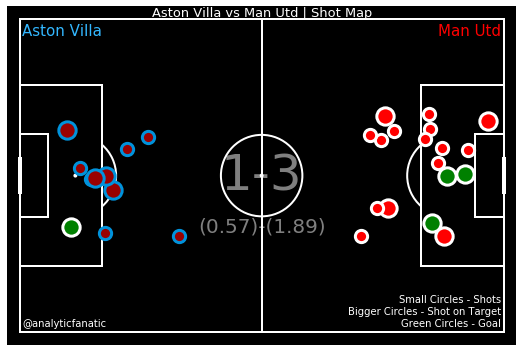

In [10]:
with open ('C:/Users/91887/Desktop/Analytics/Fins/Data/United_Matches/AVLMUN.json') as f:
    data = json.load(f)

pitch = Pitch(pitch_type='opta', pitch_color="black", line_color='white', stripe=False, figsize=(9,5),
             constrained_layout=False, tight_layout=True)
(fig, ax) = pitch.draw()

home_side = data['home']['name']
away_side = data['away']['name']

header = home_side + ' vs ' + away_side + ' | Shot Map'
score = data['score'].split(' ')[0] + '-' + data['score'].split(' ')[2]

for i in data['events']:
    if 'isShot' in i.keys() and i['isShot'] == True:
        if i['teamId'] == data['home']['teamId']:
            if 'isGoal' in i.keys() and i['isGoal'] == True:
                node = plt.scatter(100-i['x'], 100-i['y'], s=300, color='green', edgecolors="white", 
                               alpha=1, zorder=3, linewidth=3) 
            elif 8 in i['satisfiedEventsTypes']:
                node = plt.scatter(100-i['x'], 100-i['y'], s=300, color='#990000', edgecolors="#0092DB", 
                               alpha=1, zorder=3, linewidth=3)
            else:
                node = plt.scatter(100-i['x'], 100-i['y'], s=150, color='#990000', edgecolors="#0092DB", 
                               alpha=1, zorder=3, linewidth=3)
            
for i in data['events']:
    if 'isShot' in i.keys() and i['isShot'] == True:
        if i['teamId'] == data['away']['teamId']:
            if 'isGoal' in i.keys() and i['isGoal'] == True:
                node = plt.scatter(i['x'], i['y'], s=300, color='green', edgecolors="white", 
                               alpha=1, zorder=3, linewidth=3) 
            elif 8 in i['satisfiedEventsTypes']:
                node = plt.scatter(i['x'], i['y'], s=300, color='red', edgecolors="white", 
                               alpha=1, zorder=3, linewidth=3)
            else:
                node = plt.scatter(i['x'], i['y'], s=150, color='red', edgecolors="white", 
                               alpha=1, zorder=3, linewidth=3)
           
ax.text(0.5, 1, header,
        verticalalignment='top', horizontalalignment='center',
        transform=ax.transAxes,
        color='white', fontsize=13)

ax.text(0.03, 0.95, home_side,
        verticalalignment='top', horizontalalignment='left',
        transform=ax.transAxes,
        color='#33B7FF', fontsize=15)

ax.text(0.97, 0.95, away_side,
        verticalalignment='top', horizontalalignment='right',
        transform=ax.transAxes,
        color='red', fontsize=15)

ax.text(0.97, 0.05, 'Small Circles - Shots\nBigger Circles - Shot on Target\nGreen Circles - Goal',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='white', fontsize=10)

ax.text(0.03, 0.05, '@analyticfanatic',
        verticalalignment='bottom', horizontalalignment='left',
        transform=ax.transAxes,
        color='white', fontsize=10)

ax.text(0.50, 0.57, score,
        verticalalignment='top', horizontalalignment='center',
        transform=ax.transAxes,
        color='white', fontsize=50, alpha=0.5)

ax.text(0.50, 0.38, '(0.57)-(1.89)',
        verticalalignment='top', horizontalalignment='center',
        transform=ax.transAxes,
        color='white', fontsize=20, alpha=0.5)